In [21]:
import pandas as pd
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

/Users/dashakaravaieva/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:xlabel='month'>

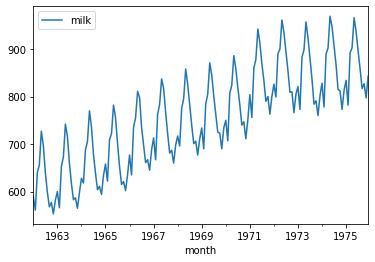

In [22]:
milk.plot()

In [23]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk)

(-1.303811587422122,
 0.627426708603035,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [24]:
import statsmodels
statsmodels.__version__

'0.13.2'

In [25]:
milk['days_in_month'] = milk.index.days_in_month

In [26]:
milk['daily'] = milk['milk']/milk['days_in_month']

<AxesSubplot:xlabel='month'>

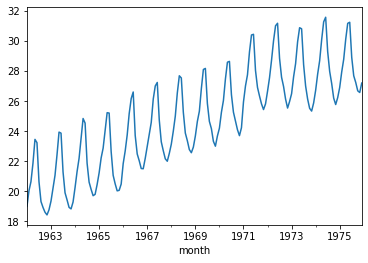

In [27]:
milk['daily'].plot()

In [28]:
milk['daily'].sum()

4166.326661899466

In [29]:
milk

,milk,days_in_month,daily
month,,,
1962-01-01,589,31,19.000000
1962-02-01,561,28,20.035714
1962-03-01,640,31,20.645161
1962-04-01,656,30,21.866667
1962-05-01,727,31,23.451613
...,...,...,...
1975-08-01,858,31,27.677419
1975-09-01,817,30,27.233333
1975-10-01,827,31,26.677419


In [30]:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)

/var/folders/2d/8s7fzr_974372gjw0dqzc7g00000gn/T/ipykernel_4516/2623738039.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff1 = milk.daily - milk.daily.shift(1)


In [31]:
milk.daily_diff12 = milk.daily - milk.daily.shift(12)

/var/folders/2d/8s7fzr_974372gjw0dqzc7g00000gn/T/ipykernel_4516/1854383968.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff12 = milk.daily - milk.daily.shift(12)


<AxesSubplot:xlabel='month'>

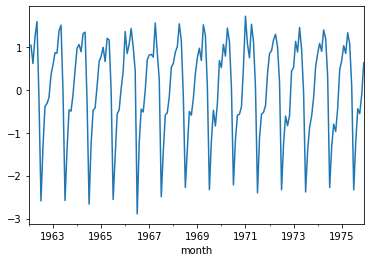

In [32]:
milk.daily_diff1.plot()

<AxesSubplot:xlabel='month'>

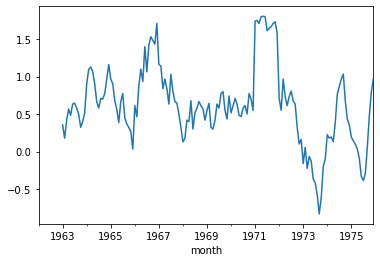

In [53]:
milk.daily_diff12.plot()

In [44]:
milk.daily_diff12_1 = milk.daily_diff12- milk.daily_diff12.shift(1)

In [51]:
milk.daily_diff12_1[13:]

month
1963-02-01   -0.176267
1963-03-01    0.240783
1963-04-01    0.147312
1963-05-01   -0.082796
1963-06-01    0.149462
                ...   
1975-08-01    0.096774
1975-09-01    0.356989
1975-10-01    0.417204
1975-11-01    0.316129
1975-12-01    0.167742
Name: daily, Length: 155, dtype: float64

<AxesSubplot:xlabel='month'>

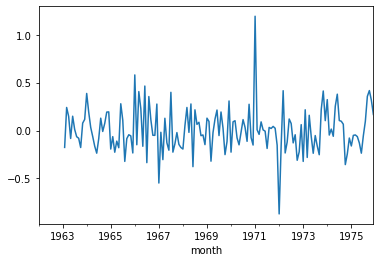

In [52]:
milk.daily_diff12_1.plot()

In [64]:
sm.tsa.stattools.adfuller(milk.daily_diff12_1[13:])

(-5.481326334796922,
 2.28084555180379e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.90513750989237)

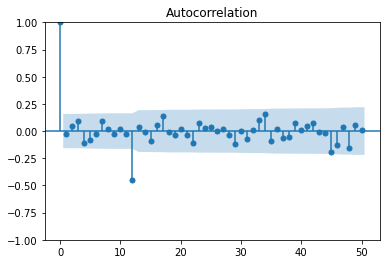

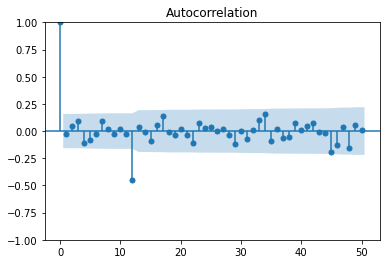

In [62]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff12_1[13:].values.squeeze(), lags=50)

/Users/dashakaravaieva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


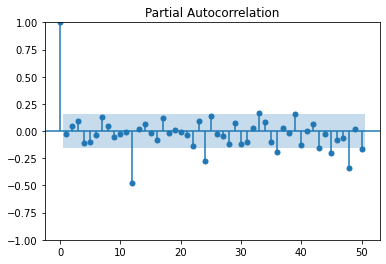

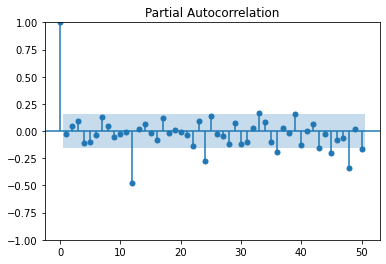

In [65]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1[13:].values.squeeze(), lags=50)

In [ ]:
pip install --upgrade pip 
pip install -U statsmodels==0.8.0rc1